In [14]:
import tensorflow as tf 

from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Normalize the pixel values to be between 0 and 1
# x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shape of the training and testing data
x_train.shape,y_train.shape,x_test.shape,y_test.shape



((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [15]:
# from tensorflow.keras.utils import to_categorical
# num_classes=10

# y_train = to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)


num_classes = 10  # Number of classes in the MNIST dataset

y_train = tf.one_hot(y_train, depth=num_classes)
y_test = tf.one_hot(y_test, depth=num_classes)

y_train.shape

TensorShape([60000, 10])

tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(10,), dtype=float32)


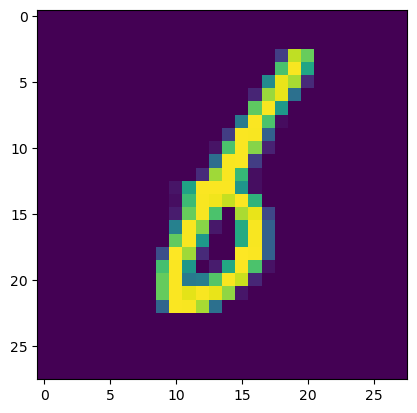

In [16]:
import numpy as np
from matplotlib import pyplot as plt


image=x_train[256]
plt.imshow(image)


print(y_train[256])

In [17]:
x_train = x_train.reshape((x_train.shape[0], -1))  # Reshape each image to a flat vector
x_test = x_test.reshape((x_test.shape[0], -1))     # Reshape each image to a flat vector

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = tf.cast(x_train, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)
type(x_train)

tensorflow.python.framework.ops.EagerTensor

In [18]:
n_input=784
n_h1=256
n_h2=256
n_output=10

weights={"h1":tf.random.normal([n_input,n_h1]),
         "h2":tf.random.normal([n_h1,n_h2]),
         "out":tf.random.normal([n_h2,n_output])
        }

biases={"h1":tf.random.normal([n_h1]),
         "h2":tf.random.normal([n_h2]),
         "out":tf.random.normal([n_output])
        }


In [19]:
def forward_prop(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights["h1"]),biases["h1"])
    out_layer1=tf.nn.relu(in_layer1)                        #relu is activation function like sigmoid
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights["h2"]),biases["h2"])
    out_layer2=tf.nn.relu(in_layer2)
    
    inp_out_layer=tf.add(tf.matmul(out_layer2,weights["out"]),biases["out"])
    
    return inp_out_layer


In [20]:
pred=forward_prop(x_train,weights,biases)
predictions=tf.argmax(pred,axis=1)         #  argmax  --> to get max form onhot enccoded row $ axis=1 bcz column wise maximum 

true_pred=tf.argmax(y_train,axis=1)        #   real output of data

print(predictions,true_pred)

tf.Tensor([7 4 0 ... 7 1 1], shape=(60000,), dtype=int64) tf.Tensor([5 0 4 ... 5 6 8], shape=(60000,), dtype=int64)


In [21]:
# cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y_train))       # used in tensorflow 1


loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
loss = tf.reduce_mean(loss_object(y_train, pred))
loss.numpy()

1255.5741

In [22]:
correct_pred=tf.equal(predictions,true_pred)
correct_pred_count = tf.reduce_sum(tf.cast(correct_pred, dtype=tf.float32))        # convert bool trur -> 1 and then sum all 

# Print or use the count of correct predictions
print(int(correct_pred_count))


7006


In [23]:
varlist=[weights.values(),biases.values()]
len(varlist)

2

In [24]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# optimize = optimizer.minimize(loss,varlist)

In [25]:
import tensorflow as tf
from keras.layers import Dense
from keras import Sequential

model=Sequential()

In [27]:
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam",loss="CategoricalCrossentropy",metrics="accuracy")# # Get the predictions


model.fit(x_train,y_train,epochs=10,batch_size=100)
pred=model.predict(x_test)
score=model.evaluate(x_test,y_test)




Epoch 1/10
600/600 [==============================] - 5s 6ms/step - loss: 0.1872 - accuracy: 0.9699
Epoch 2/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0705 - accuracy: 0.9818
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0546 - accuracy: 0.9858
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0477 - accuracy: 0.9876
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0402 - accuracy: 0.9890
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0334 - accuracy: 0.9910
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0284 - accuracy: 0.9925
Epoch 8/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0267 - accuracy: 0.9930
Epoch 9/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0263 - accuracy: 0.9931
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9800